In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Crude oil (1).csv to Crude oil (1).csv


In [ ]:
oil = pd.read_csv("Crude oil (1).csv")

In [ ]:
oil.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [ ]:
oil['Date']=pd.to_datetime(oil['Date'])

Exploratory Data Analysis (EDA)

In [ ]:
oil.shape

(2548, 6)

In [ ]:
oil.isnull().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [ ]:
oil["Volume"].fillna(oil['Volume'].mean(),inplace=True)

In [ ]:
oil.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2548 non-null   datetime64[ns]
 1   Close/Last  2548 non-null   float64       
 2   Volume      2548 non-null   float64       
 3   Open        2548 non-null   float64       
 4   High        2548 non-null   float64       
 5   Low         2548 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 119.6 KB


In [ ]:
oil.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.331068e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.255235e+05,48.665000,49.317500,47.800000
50%,59.720000,3.679130e+05,59.770000,60.545000,58.850000
75%,87.467500,5.558335e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


<Axes: >

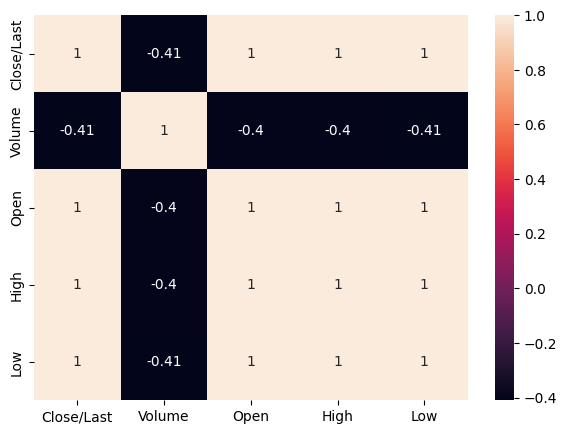

In [ ]:
plt.figure(figsize = (7, 5))
sns.heatmap(oil.corr(), annot = True)

Correlation is measured on a scale of -1 to 1. -1 means complete negative correlation and 1 means complete positive correlation. 0 means no correlation at all.

In [ ]:
oil.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,-0.407608,0.998189,0.999063,0.999212
Volume,-0.407608,1.000000,-0.404439,-0.401378,-0.410005
Open,0.998189,-0.404439,1.000000,0.999024,0.998798
High,0.999063,-0.401378,0.999024,1.000000,0.998495
Low,0.999212,-0.410005,0.998798,0.998495,1.000000


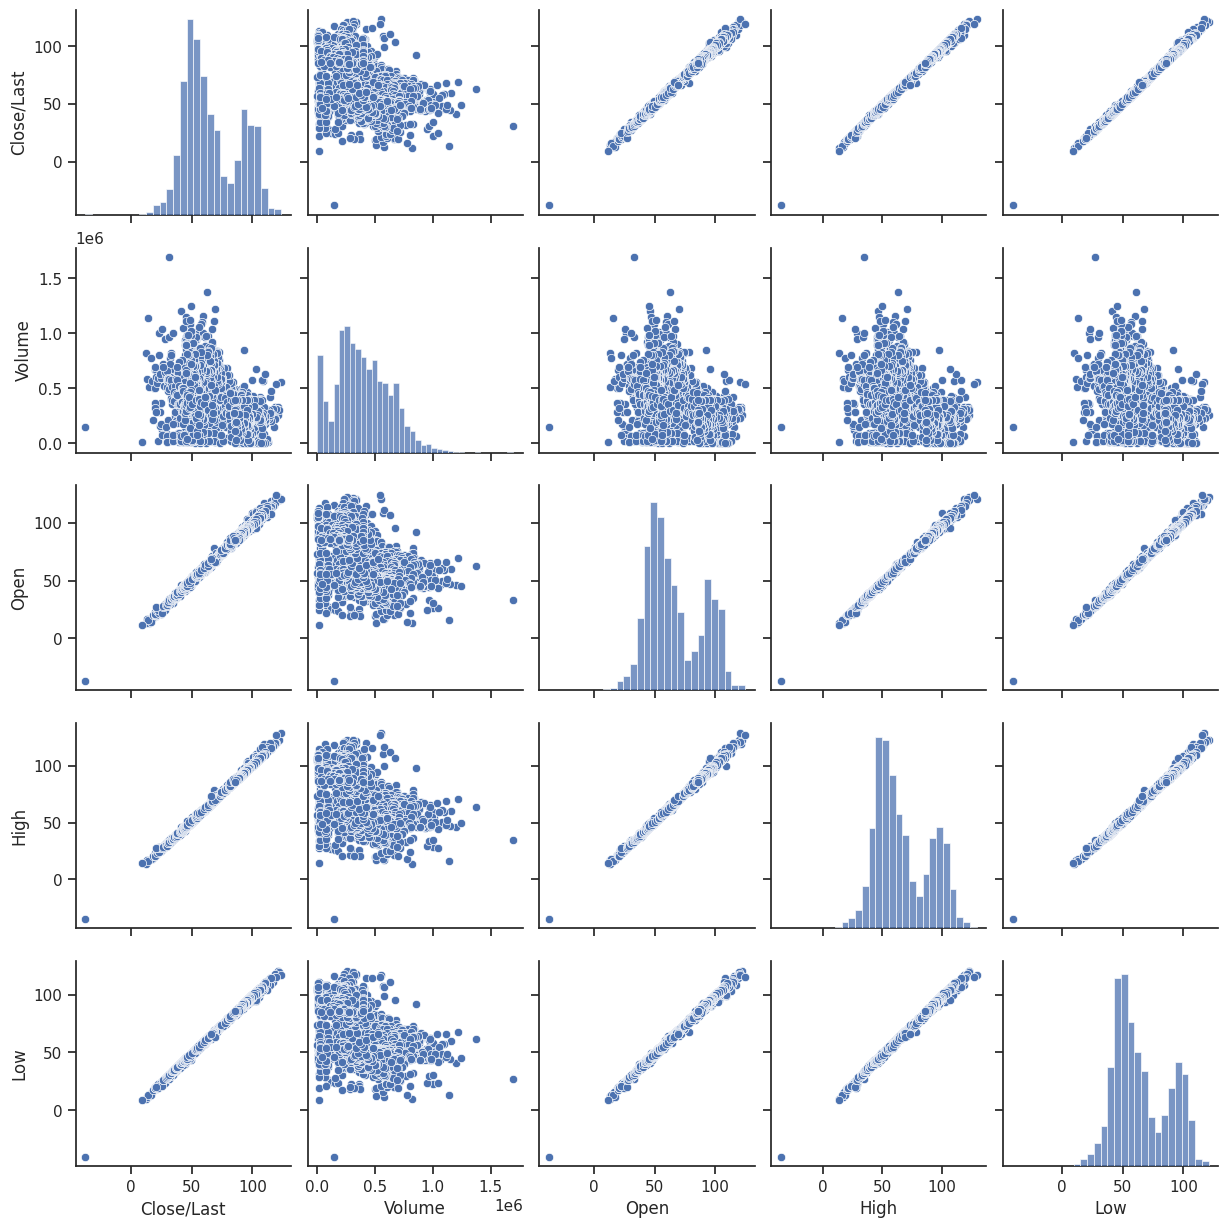

In [ ]:
sns.set(style="ticks")
sns.pairplot(oil,diag_kind="hist")

In [ ]:
data=oil.copy()

In [ ]:
# Calculate the interquartile range (IQR) for Close/Last Column
Q1 = data["Close/Last"] .quantile(0.25)
Q3 = data["Close/Last"] .quantile(0.75)
IQR_Close  = Q3 - Q1
limit_Close = 1.5*IQR_Close
print(limit_Close)
# Identify and remove outliers
data["Close/Last"] = data["Close/Last"][~((data["Close/Last"] < (Q1 - limit_Close)) | (data["Close/Last"] > (Q3 + limit_Close)))]
# Calculate the interquartile range (IQR) for Volume column
Q1 = data["Volume"] .quantile(0.25)
Q3 = data["Volume"] .quantile(0.75)
IQR_Volume  = Q3 - Q1
limit_Volume = 1.5*IQR_Volume
print(limit_Volume)
# Identify and remove outliers
data["Volume"] = data["Volume"][~((data["Volume"] < (Q1 - limit_Volume)) | (data["Volume"] > (Q3 + limit_Volume)))]
# Calculate the interquartile range (IQR) for Open column
Q1 = data["Open"] .quantile(0.25)
Q3 = data["Open"] .quantile(0.75)
IQR_Open  = Q3 - Q1
limit_Open = 1.5*IQR_Open
print(limit_Open)
# Identify and remove outliers
data["Open"] = data["Open"][~((data["Open"] < (Q1 - limit_Open)) | (data["Open"] > (Q3 + limit_Open)))]
# Calculate the interquartile range (IQR) for High column
Q1 = data["High"] .quantile(0.25)
Q3 = data["High"] .quantile(0.75)
IQR_High  = Q3 - Q1
limit_High = 1.5*IQR_High
print(limit_High)
# Identify and remove outliers
data["High"] = data["High"][~((data["High"] < (Q1 - limit_High)) | (data["High"] > (Q3 + limit_High)))]
# Calculate the interquartile range (IQR) for Low column
Q1 = data["Low"] .quantile(0.25)
Q3 = data["Low"] .quantile(0.75)
IQR_Low  = Q3 - Q1
limit_Low  = 1.5*IQR_Low
print(limit_Low )
# Identify and remove outliers
data["Low"] = data["Low"][~((data["Low"] < (Q1 - limit_Low)) | (data["Low"] > (Q3 + limit_Low)))]


58.27125000000001
495465.0
58.17750000000001
59.06624999999998
57.813750000000006


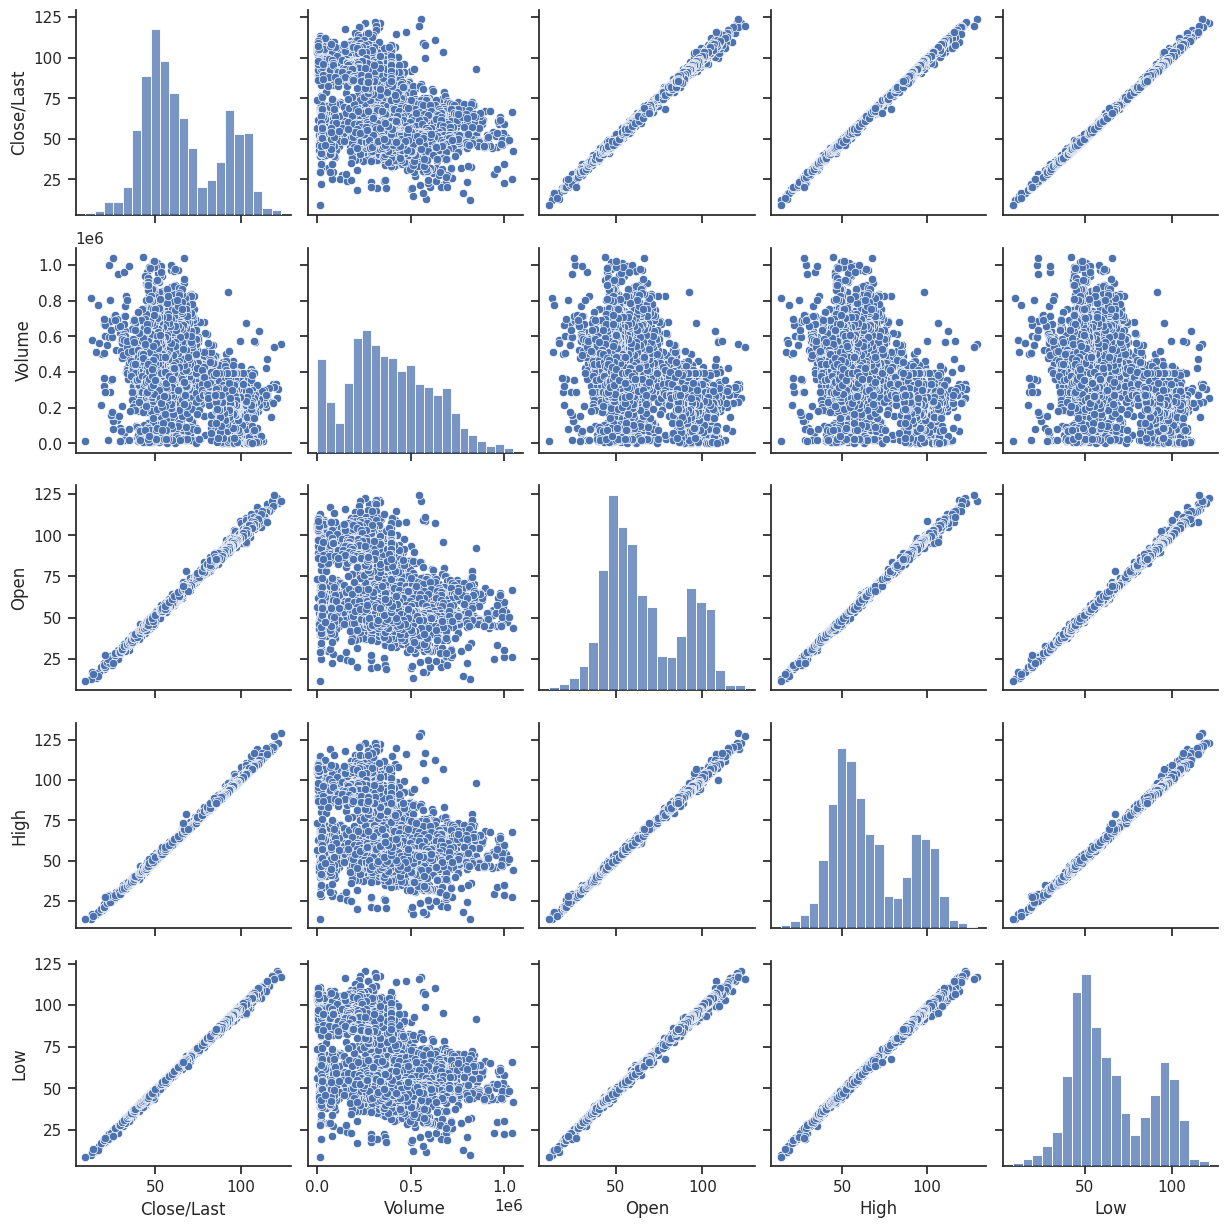

In [ ]:
sns.pairplot(data)

<Axes: ylabel='Density'>

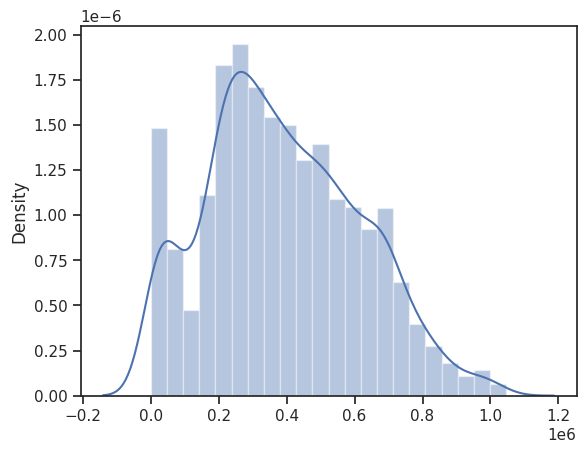

In [ ]:
sns.distplot([data['Volume']])

<Axes: ylabel='Density'>

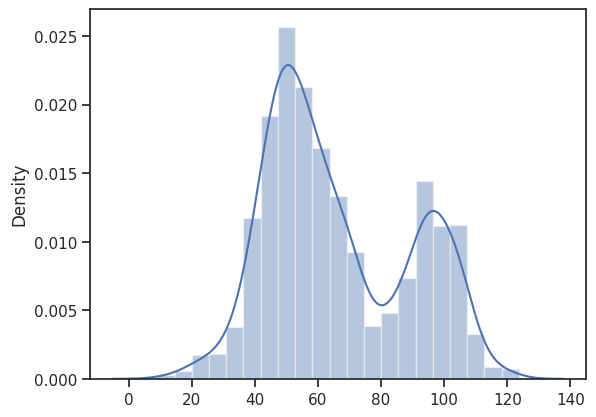

In [ ]:
sns.distplot([data['Close/Last']])

<Axes: ylabel='Density'>

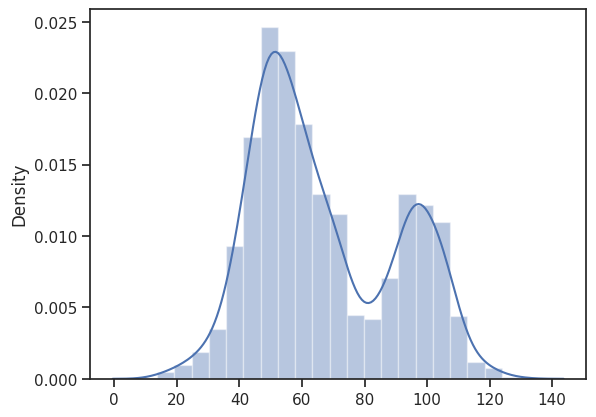

In [ ]:
sns.distplot([data['High']])

<Axes: xlabel='Open', ylabel='Density'>

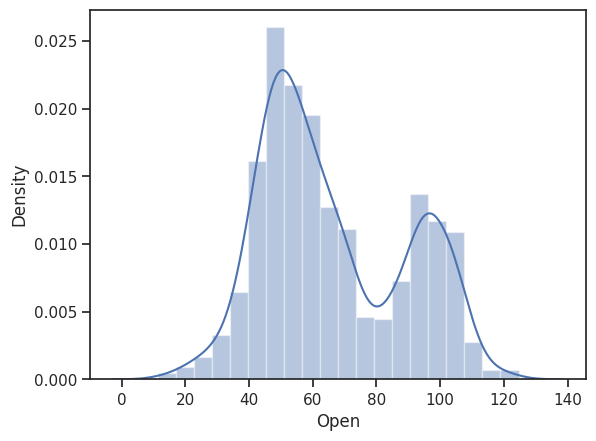

In [ ]:
sns.distplot(data['Open'])

Here to forecast we are taking close column data for forecasting

Renaming the column the Close/Last to close

In [ ]:
data=data.rename({'Close/Last':'close'},axis=1)

<Axes: >

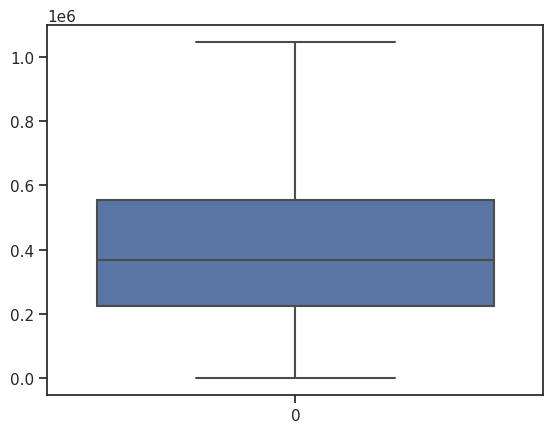

In [ ]:
sns.boxplot(data['Volume'])

<Axes: >

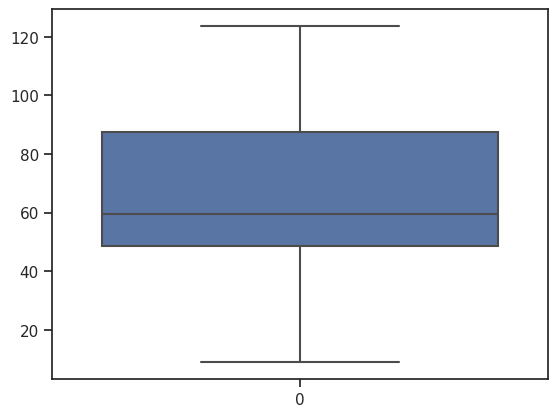

In [ ]:
sns.boxplot(data['close'])

<Axes: >

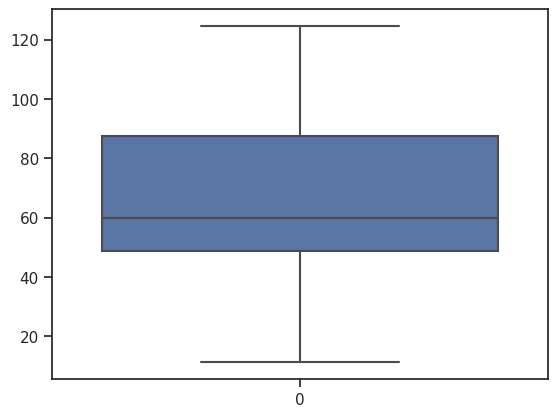

In [ ]:
sns.boxplot(data['Open'])

<Axes: >

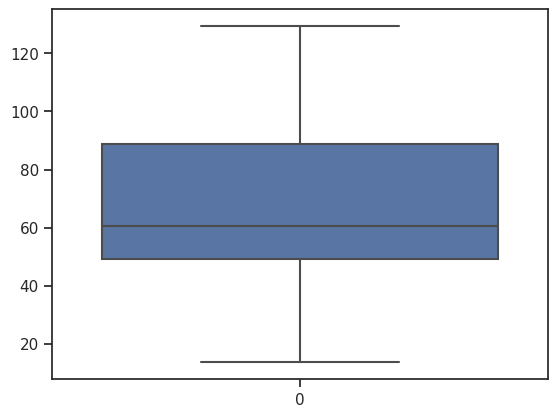

In [ ]:
sns.boxplot(data['High'])

<Axes: >

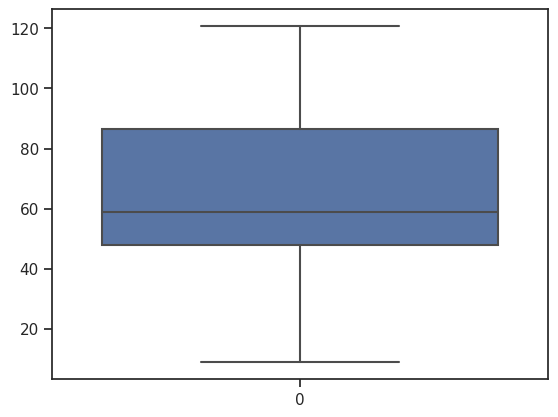

In [ ]:
sns.boxplot(data['Low'])

In [ ]:
data.columns


Index(['Date', 'close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

Creating a new dataframe using date and close columns

In [ ]:
data1=pd.DataFrame({'Date':data['Date'],'close':data['close']})
data1
data2=data1.copy()
data1

,Date,close
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [ ]:
data1 = data1.sort_index()

In [ ]:
data1.index.is_unique

True

In [ ]:
data1['Date']=pd.to_datetime(data1.Date)

In [ ]:
data1.shape

(2548, 2)

setting date as index

In [ ]:
data1.dtypes

Date     datetime64[ns]
close           float64
dtype: object

In [ ]:
data1=data1.set_index('Date')
data1

,close
Date,
2022-10-28,87.90
2022-10-27,88.26
2022-10-26,87.91
2022-10-25,85.32
2022-10-24,84.58
...,...
2012-11-05,85.65
2012-11-02,84.86
2012-11-01,87.09


In [ ]:
data1['close'].describe()

count    2547.000000
mean       66.084444
std        22.643492
min         9.060000
25%        48.635000
50%        59.720000
75%        87.555000
max       123.700000
Name: close, dtype: float64

Observing the Average Monthly Closing

In [ ]:
# Splitting the dates
oil_data_daysplit = data.copy()
oil_data_daysplit['Day'] = oil_data_daysplit['Date'].dt.day
oil_data_daysplit['Month'] = oil_data_daysplit['Date'].dt.month
oil_data_daysplit['Year'] = oil_data_daysplit['Date'].dt.year
oil_data_daysplit

,Date,close,Volume,Open,High,Low,Day,Month,Year
0,2022-10-28,87.90,241417.000000,88.67,88.76,87.08,28,10,2022
1,2022-10-27,88.26,273717.000000,88.26,89.79,87.33,27,10,2022
2,2022-10-26,87.91,271474.000000,85.07,88.41,84.14,26,10,2022
3,2022-10-25,85.32,226337.000000,84.88,86.03,83.06,25,10,2022
4,2022-10-24,84.58,238458.000000,85.24,85.92,82.63,24,10,2022
...,...,...,...,...,...,...,...,...,...
2543,2012-11-05,85.65,185846.000000,84.65,85.90,84.34,5,11,2012
2544,2012-11-02,84.86,273619.000000,86.91,87.24,84.66,2,11,2012
2545,2012-11-01,87.09,185097.000000,86.10,87.42,85.92,1,11,2012
2546,2012-10-31,86.24,192354.000000,85.73,87.19,85.61,31,10,2012


In [ ]:
#  Generating the avgerage open monthly price
all_month_year_df = pd.pivot_table(oil_data_daysplit, values="close",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
# Setting the index (month names)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
Jan,0.000000,94.729565,95.054783,47.657727,31.775789,52.648500,63.659048,51.550476,57.528571,52.102105,82.979000,63.862392
Feb,0.000000,95.348500,100.656500,50.827500,30.616500,53.462105,62.183684,54.980526,50.545789,59.061053,91.628947,65.022474
Mar,0.000000,93.160476,100.509048,47.854091,38.113182,49.673913,62.771905,58.187143,30.445455,62.357391,108.262174,65.000137
Apr,0.000000,92.067727,102.137727,54.378636,41.198571,51.117368,66.326190,63.870952,19.362000,61.714762,101.640500,65.815550
May,0.000000,94.771304,101.910909,59.388571,46.828095,48.539545,69.986364,60.865455,28.527500,65.157000,109.259524,69.005047
Jun,0.000000,95.800500,105.146667,59.828636,48.898636,45.195909,67.322857,54.706500,38.313636,71.352727,114.339048,69.634225
Jul,0.000000,104.548261,102.464348,51.190870,44.840000,46.675000,70.477143,57.546364,40.765909,72.430476,99.384500,69.398140
Aug,0.000000,106.538636,96.076190,42.889048,44.799130,48.057826,67.845217,54.846818,42.371905,67.711364,91.482609,66.282624
Sep,0.000000,106.302381,93.167273,45.491818,45.276190,49.877000,70.084737,56.967000,39.625714,71.542857,83.801905,66.329423
Oct,85.960000,100.552609,84.339130,46.289545,49.940000,51.611364,70.757826,54.005652,39.554545,81.220476,87.019500,66.724189


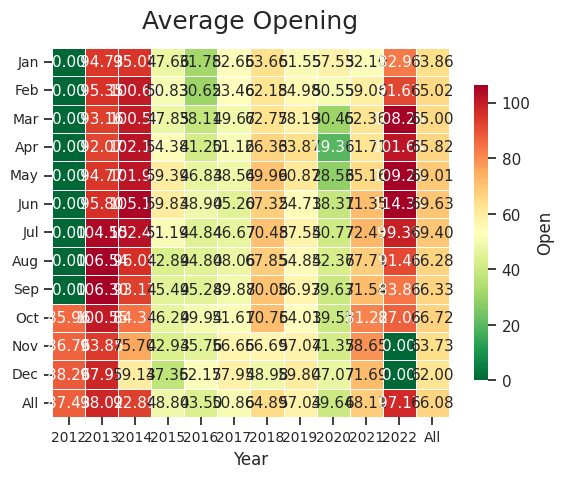

In [ ]:
# plot
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f',
                 annot=True, linewidths=.5, annot_kws={'size':11},
                 cbar_kws={'shrink':.8, 'label':'Open'})

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

PLOTTING THE DATA WITH THE HELP OF LINE PLOT

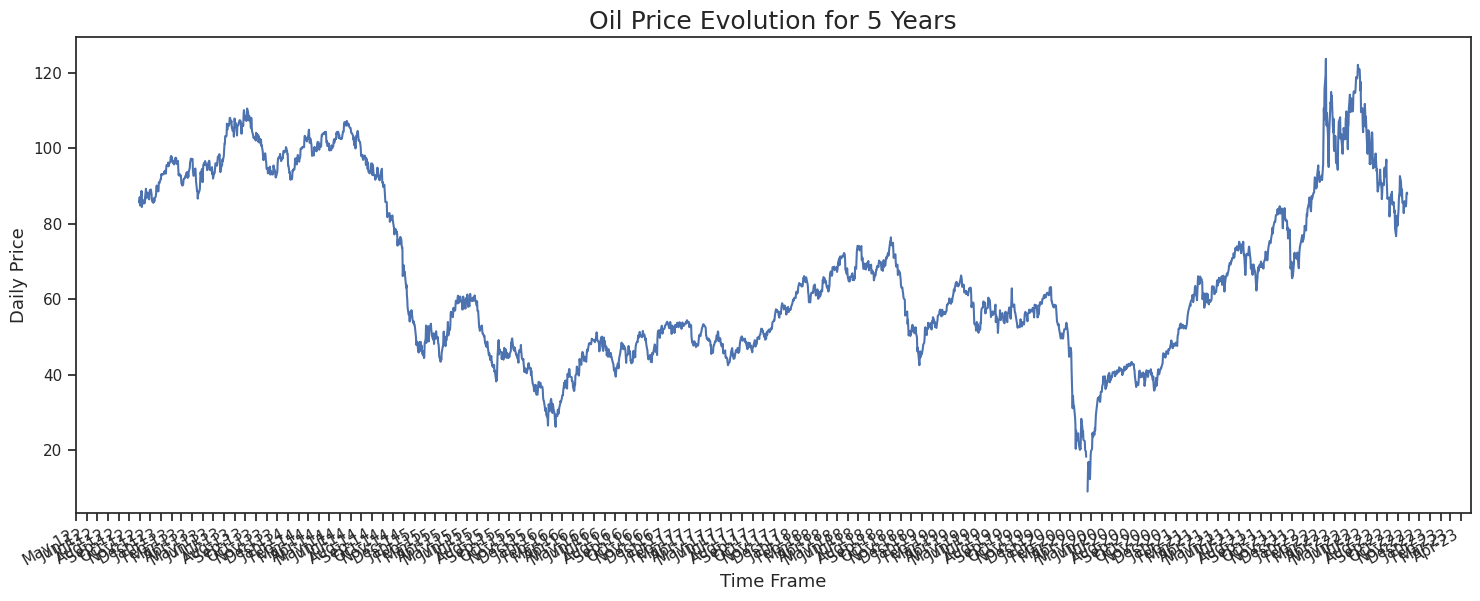

In [ ]:
# build the frame
fig,ax = plt.subplots(figsize=(18,7))

date = oil['Date']
value = data['close']

# give the title, x and y axis names
plt.title("Oil Price Evolution for 5 Years",fontsize=18)
plt.xlabel("Time Frame",fontsize=13)
plt.ylabel("Daily Price",fontsize=13) # Close Price

# display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,value);

# auto format tilt the x-axis labels
fig.autofmt_xdate()


In [ ]:
data1['close'].mean()

66.08444444444444

In [ ]:
data1['close'].fillna(data1['close'].mean(),inplace=True)

In [ ]:
data1

,close
Date,
2022-10-28,87.90
2022-10-27,88.26
2022-10-26,87.91
2022-10-25,85.32
2022-10-24,84.58
...,...
2012-11-05,85.65
2012-11-02,84.86
2012-11-01,87.09


In [ ]:
data1.isnull().sum()

close    0
dtype: int64

<Figure size 640x480 with 0 Axes>

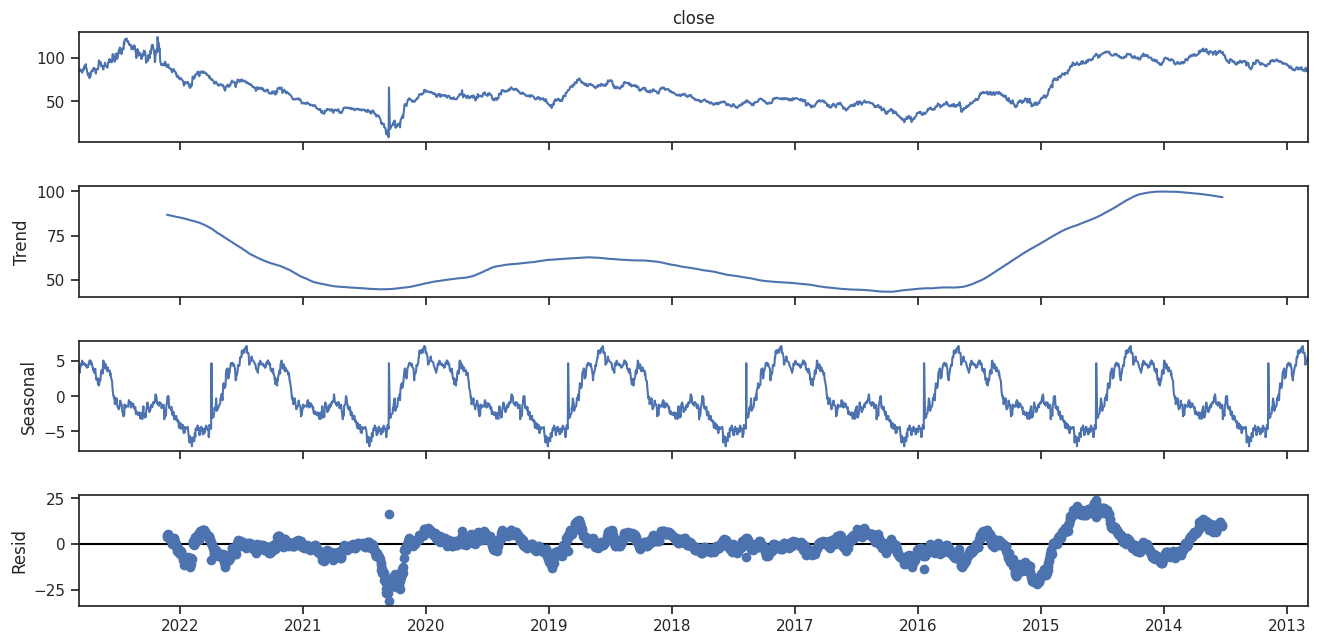

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data1['close'], model='additive', period=365)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


Here Stationarity is not found correctly with the help of seasonal_decompose.So we need to perform adafuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(data1['close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.514121
p-value: 0.526514
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


As p-value is greater than 0.05 we can say that timeseries in non-stationary

**TRANSFORMATIONS**



In [ ]:
data1['close']

Date
2022-10-28    87.90
2022-10-27    88.26
2022-10-26    87.91
2022-10-25    85.32
2022-10-24    84.58
              ...  
2012-11-05    85.65
2012-11-02    84.86
2012-11-01    87.09
2012-10-31    86.24
2012-10-30    85.68
Name: close, Length: 2548, dtype: float64

**1.Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()

In [ ]:
price_data_std=data1["close"].values.reshape(-1,1)

In [ ]:
scale=scaler.fit_transform(price_data_std)

In [ ]:
scale

array([[0.96381434],
       [0.97971919],
       [0.96425614],
       ...,
       [0.92802843],
       [0.89047531],
       [0.86573443]])

In [ ]:
data1['std_close']=scale

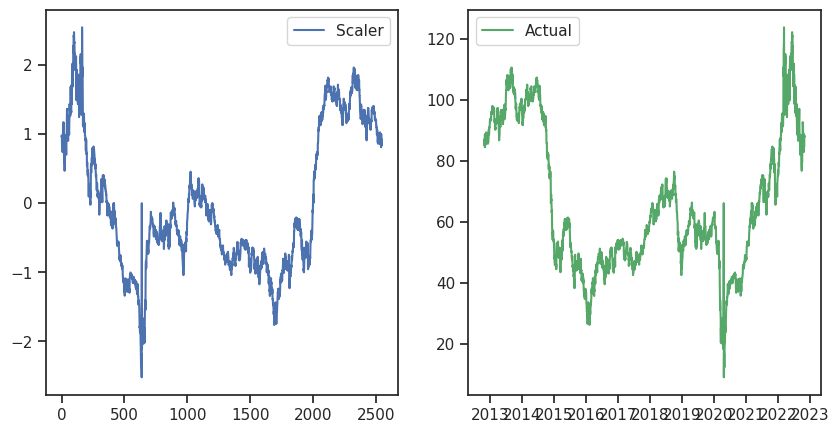

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(scale,label="Scaler")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(data1["close"],label="Actual",c='g')
plt.legend(loc="best")

In [ ]:
result = adfuller(data1['std_close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.514121
p-value: 0.526514
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Even after standardisation the data is non-stationary

<Figure size 640x480 with 0 Axes>

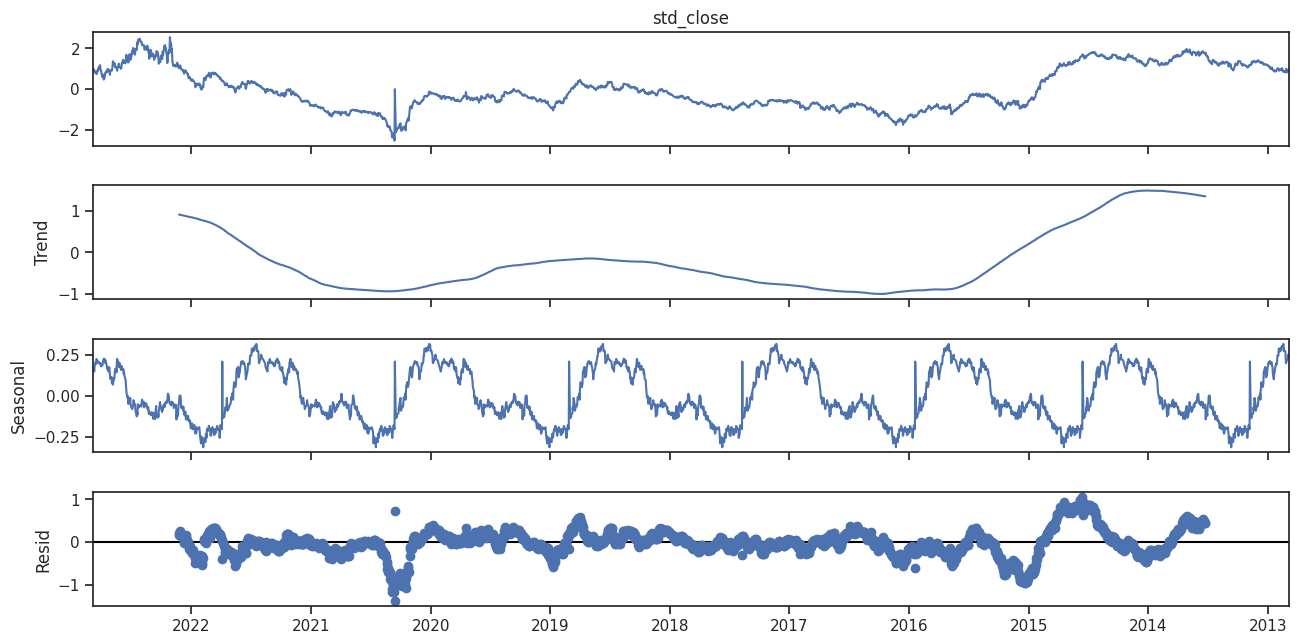

In [ ]:
decomposition = seasonal_decompose(data1['std_close'], model='additive', period=365)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()

MIN MAX SCALING

In [ ]:
scale2=MinMaxScaler()
min=scale2.fit_transform(price_data_std)

In [ ]:
min

array([[0.68771807],
       [0.69085834],
       [0.6878053 ],
       ...,
       [0.68065248],
       [0.67323796],
       [0.66835311]])

In [ ]:
data1['close_minmax']=min

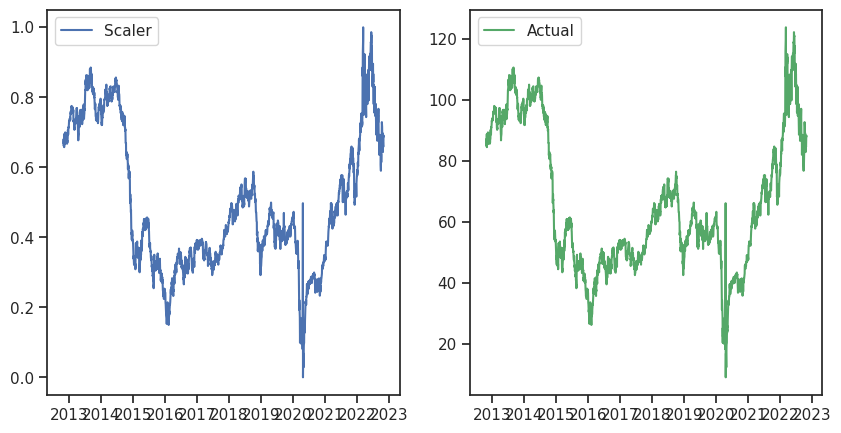

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data1['close_minmax'],label="Scaler")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(data1["close"],label="Actual",c='g')
plt.legend(loc="best")

In [ ]:
result = adfuller(data1['close_minmax'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.514121
p-value: 0.526514
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Even after MinmaxScaling the data is non-stationary

<Figure size 640x480 with 0 Axes>

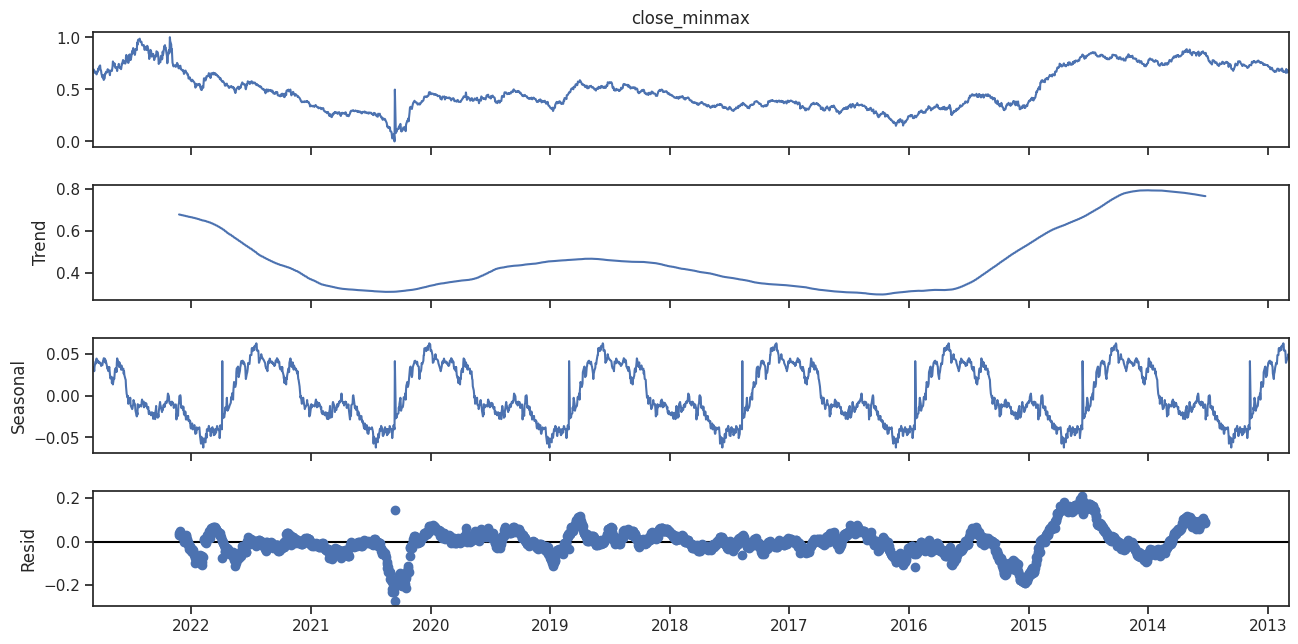

In [ ]:
decomposition = seasonal_decompose(data1['close_minmax'], model='additive', period=365)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()

**POWER TRANSFORMATION**

In [ ]:
log_data=np.log(price_data_std)

In [ ]:
log_data

array([[4.4761998 ],
       [4.480287  ],
       [4.47631356],
       ...,
       [4.46694207],
       [4.45713411],
       [4.45061943]])

In [ ]:
data1['log_data']=log_data

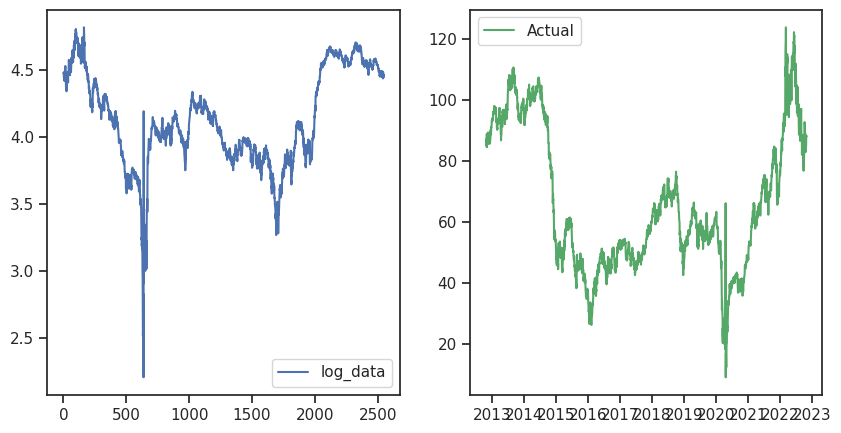

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(log_data,label="log_data")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(data1["close"],label="Actual",c='g')
plt.legend(loc="best")

In [ ]:
result = adfuller(data1['log_data'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.312889
p-value: 0.167845
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


As p-value is greater than 0.05 this series is also non-stationary

<Figure size 640x480 with 0 Axes>

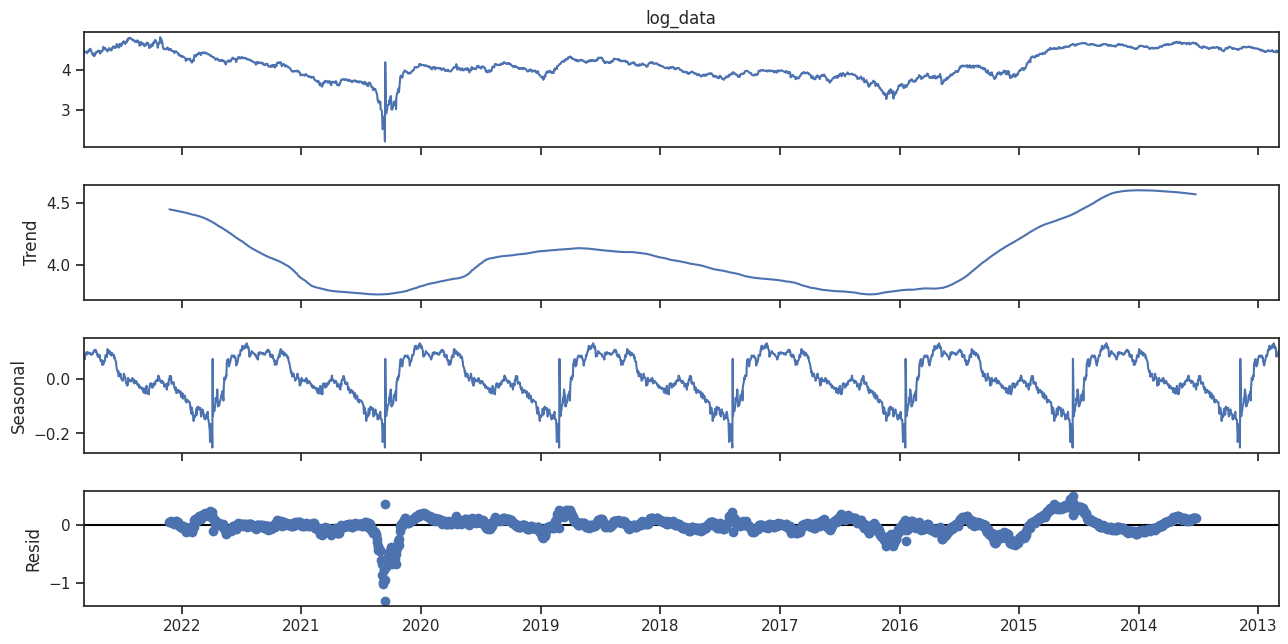

In [ ]:
decomposition = seasonal_decompose(data1['log_data'], model='additive', period=365)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()

**Difference Scaling**

In [ ]:
data1['diff_data']=data1['close']-data1['close'].shift(365)

In [ ]:
data1['diff_data']

Date
2022-10-28      NaN
2022-10-27      NaN
2022-10-26      NaN
2022-10-25      NaN
2022-10-24      NaN
              ...  
2012-11-05   -15.93
2012-11-02   -16.81
2012-11-01   -14.19
2012-10-31   -14.02
2012-10-30   -13.51
Name: diff_data, Length: 2548, dtype: float64

In [ ]:
result = adfuller(data1['diff_data'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.555115
p-value: 0.506092
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


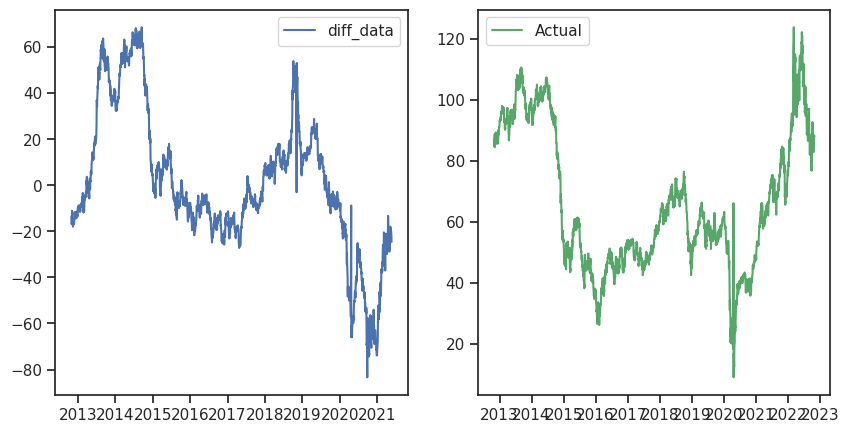

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data1['diff_data'],label="diff_data")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(data1["close"],label="Actual",c='g')
plt.legend(loc="best")

In [ ]:
oilprice=pd.DataFrame(data1['close'])


In [ ]:
oilprice

,close
Date,
2022-10-28,87.90
2022-10-27,88.26
2022-10-26,87.91
2022-10-25,85.32
2022-10-24,84.58
...,...
2012-11-05,85.65
2012-11-02,84.86
2012-11-01,87.09


In [ ]:
#ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa import arima_process

In [ ]:
# Split the data into train and test sets
oilprice
train = oilprice[:int(len(oilprice)*0.7)]
test = oilprice[int(len(oilprice)*0.7):]


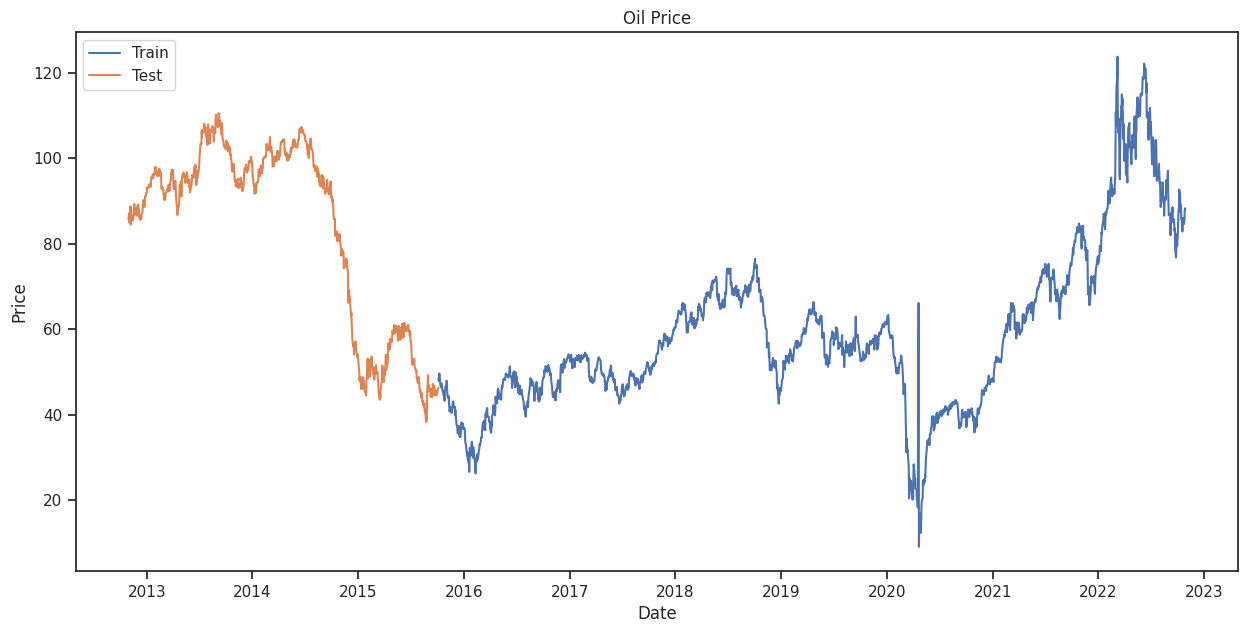

In [ ]:
#create a visualization for train, test

plt.figure(figsize=(15,7))
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.legend()
plt.show()


Checking for Best Model

In [ ]:
from sklearn.metrics import mean_squared_error


**LSTM**

In [ ]:
# LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam


def build_lstm_model():
    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model


model = build_lstm_model()

# Train the model
model.fit(train, train['close'], epochs=100, batch_size=32)

# Evaluate the model
test_predictions = model.predict(test)

# Calculate the mean squared error
mse = mean_squared_error(test['close'], test_predictions)

# Print the mean squared error
print('Mean Squared Error:', mse)

Epoch 1/100
56/56 [==============================] - 11s 12ms/step - loss: 3494.9351
Epoch 2/100
56/56 [==============================] - 0s 8ms/step - loss: 2581.7139
Epoch 3/100
56/56 [==============================] - 1s 9ms/step - loss: 2144.5796
Epoch 4/100
56/56 [==============================] - 1s 10ms/step - loss: 1882.9877
Epoch 5/100
56/56 [==============================] - 1s 10ms/step - loss: 1665.5112
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 1480.5516
Epoch 7/100
56/56 [==============================] - 0s 8ms/step - loss: 1324.6062
Epoch 8/100
56/56 [==============================] - 1s 9ms/step - loss: 1184.1068
Epoch 9/100
56/56 [==============================] - 0s 8ms/step - loss: 1063.3539
Epoch 10/100
56/56 [==============================] - 1s 9ms/step - loss: 954.0696
Epoch 11/100
56/56 [==============================] - 1s 10ms/step - loss: 856.2006
Epoch 12/100
56/56 [==============================] - 1s 10ms/step - loss: 766.944

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['close'], test_predictions))
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 3.1691147605939394


AUTO ARIMA

In [ ]:
# split the available data as historical and future for computing forecast error
oil_seasonal =oilprice
oil_y_hist = oil_seasonal.loc['2012':'2022','close']
oil_y_future = oil_seasonal.loc['2023':, 'close']
oil_y_hist, oil_y_future

(Date
 2022-10-28    87.90
 2022-10-27    88.26
 2022-10-26    87.91
 2022-10-25    85.32
 2022-10-24    84.58
               ...  
 2012-11-05    85.65
 2012-11-02    84.86
 2012-11-01    87.09
 2012-10-31    86.24
 2012-10-30    85.68
 Name: close, Length: 2548, dtype: float64,
 Series([], Name: close, dtype: float64))

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


In [ ]:
# Cross validation using sliding window
import pmdarima as pm
from pmdarima import model_selection

In [ ]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import StepwiseContext

In [ ]:
# Model Creation using Auto-ARIMA
with StepwiseContext(max_dur=25):
  oil_auto_arima_model = auto_arima(y=oil_y_hist,
                                seasonal=True,
                                stationary = False,
                                information_criterion="aic",
                                stepwise=True,
                                parallel=True,
                                trace=True,
                                m=22,
                                with_intercept = True,
                                random_state = 42,
                                n_jobs=3,start_p = 2,
                                max_p = 5,start_q = 0,
                                max_q = 2,
                                max_P = 1, max_Q = 1
                                )
oil_order = oil_auto_arima_model.get_params().get("order")

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(1,0,1)[22] intercept   : AIC=10814.603, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[22] intercept   : AIC=11047.708, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[22] intercept   : AIC=10829.432, Time=3.77 sec
 ARIMA(0,1,1)(0,0,1)[22] intercept   : AIC=10809.949, Time=6.04 sec
 ARIMA(0,1,0)(0,0,0)[22]             : AIC=11045.708, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[22] intercept   : AIC=10814.304, Time=0.65 sec
 ARIMA(0,1,1)(1,0,1)[22] intercept   : AIC=10811.920, Time=19.39 sec
 ARIMA(0,1,1)(1,0,0)[22] intercept   : AIC=10809.964, Time=6.03 sec
 ARIMA(0,1,0)(0,0,1)[22] intercept   : AIC=11039.276, Time=3.98 sec
 ARIMA(1,1,1)(0,0,1)[22] intercept   : AIC=10811.859, Time=8.79 sec
 ARIMA(0,1,2)(0,0,1)[22] intercept   : AIC=10811.854, Time=7.35 sec
 ARIMA(1,1,0)(0,0,1)[22] intercept   : AIC=10829.451, Time=2.77 sec
 ARIMA(1,1,2)(0,0,1)[22] intercept   : AIC=10813.842, Time=5.16 sec
 ARIMA(0,1,1)(0,0,1)[22]             : AIC=10807.950, Time=1.65 sec

Bes

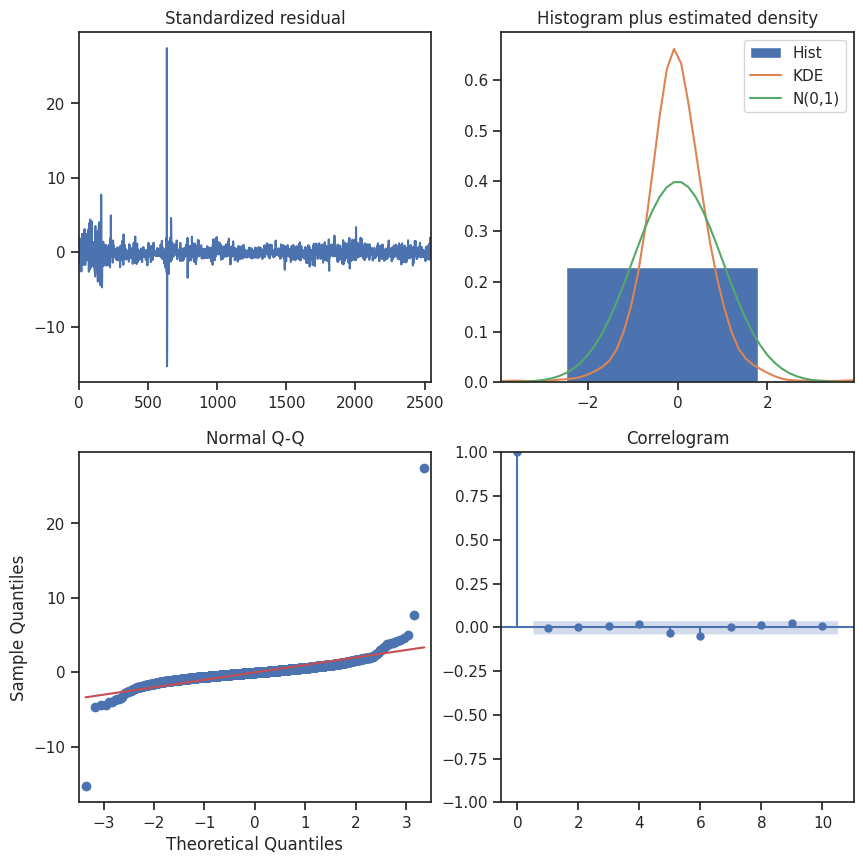

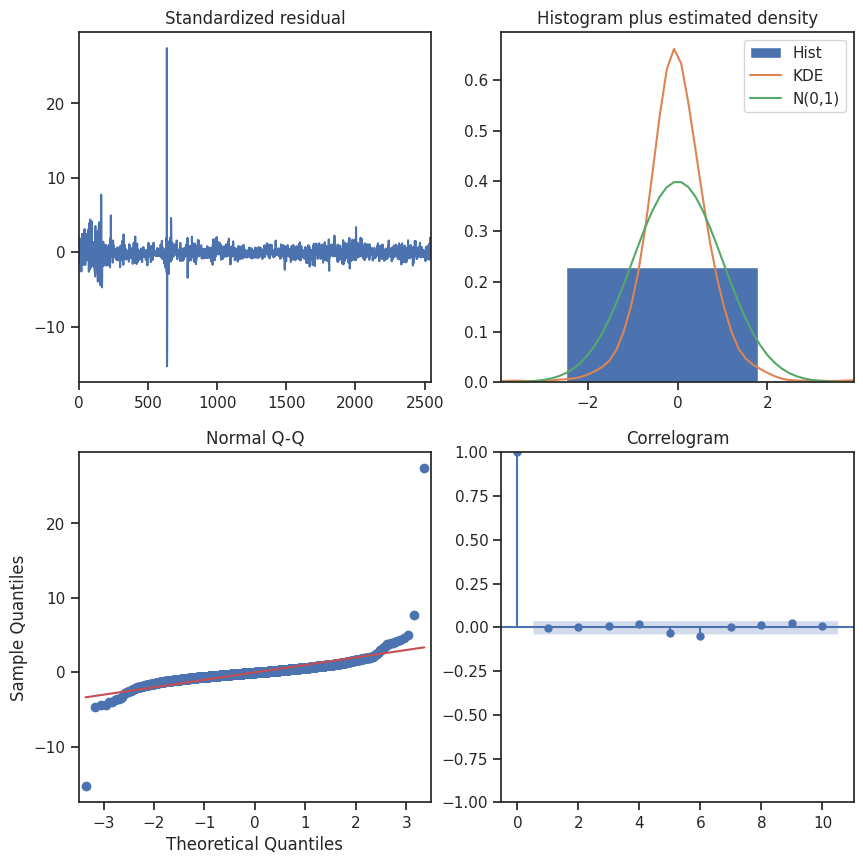

In [ ]:
oil_auto_arima_model.plot_diagnostics(figsize=(10,10))

In [ ]:
oil_auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2548
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 22)   Log Likelihood               -5400.975
Date:                            Tue, 02 Jan 2024   AIC                          10807.950
Time:                                    11:18:26   BIC                          10825.478
Sample:                                         0   HQIC                         10814.307
                                           - 2548                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3068      0.003   -112.170      0.000      -0.312      -0.301
ma.S.L22      -0.0502      0.018     -2.843      0.004      -0.085      -0.016
sigma2         4.0678      0.012    349.949      0.000       4.045       4.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           6424483.94
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             6.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       248.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

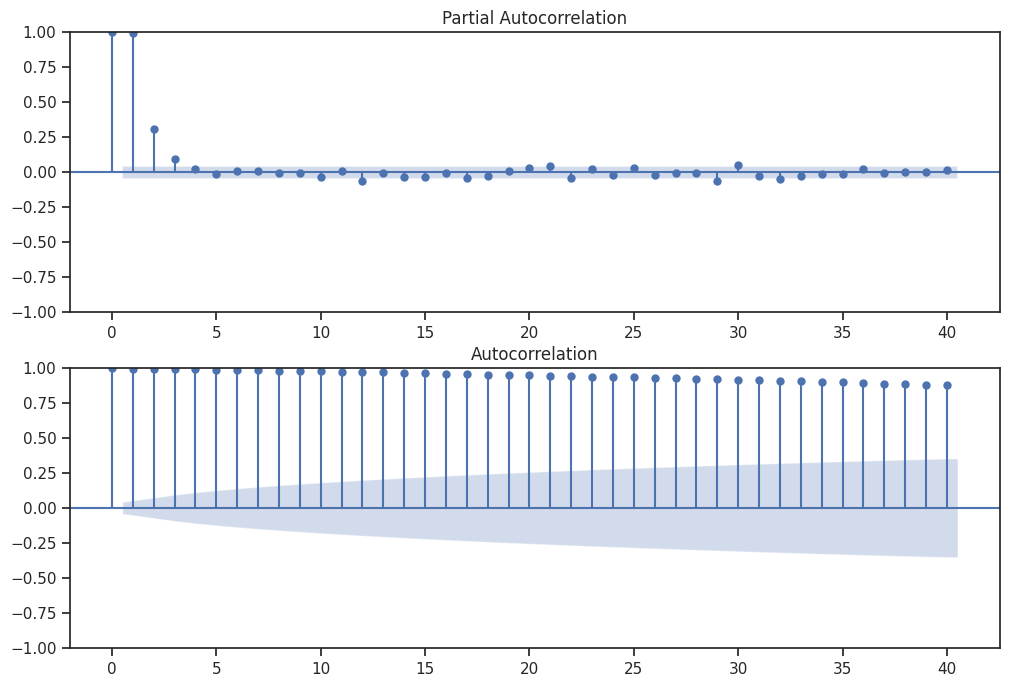

In [ ]:
import statsmodels as sm
from statsmodels import tsa
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_pacf(data1['diff_data'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_acf(data1['diff_data'].dropna(),lags=40,ax=ax2)

In [ ]:
# Fit the ARIMA model to the training data
model = ARIMA(train['close'], order=(0,1,1),seasonal_order=(0,0,1,22))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            close   No. Observations:                 1783
Model:             ARIMA(0, 1, 1)x(0, 0, 1, 22)   Log Likelihood               -3976.951
Date:                          Tue, 02 Jan 2024   AIC                           7959.901
Time:                                  11:18:27   BIC                           7976.358
Sample:                                       0   HQIC                          7965.979
                                         - 1783                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3406      0.004    -94.237      0.000      -0.348      -0.334
ma.S.L22      -0.0615      0.024     -2.552      0.011      -0.109      -0.014
sigma2         5.0807      0.018    277.790      0.000       5.045       5.117
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3545844.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             7.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       221.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train)+len(test)-1
print(start,end)

1783 2547


In [ ]:
pred_arima = model_fit.predict(start=start, end=end)
pred_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1783    48.343440
1784    48.241642
1785    48.353942
1786    48.318990
1787    48.352463
          ...    
2543    48.193620
2544    48.193620
2545    48.193620
2546    48.193620
2547    48.193620
Name: predicted_mean, Length: 765, dtype: float64

In [ ]:
# Evaluate the predictions
rmse_arima = np.sqrt(mean_squared_error(pred_arima,test['close']))
print('RMSE:', rmse_arima)

RMSE: 41.25514651013394


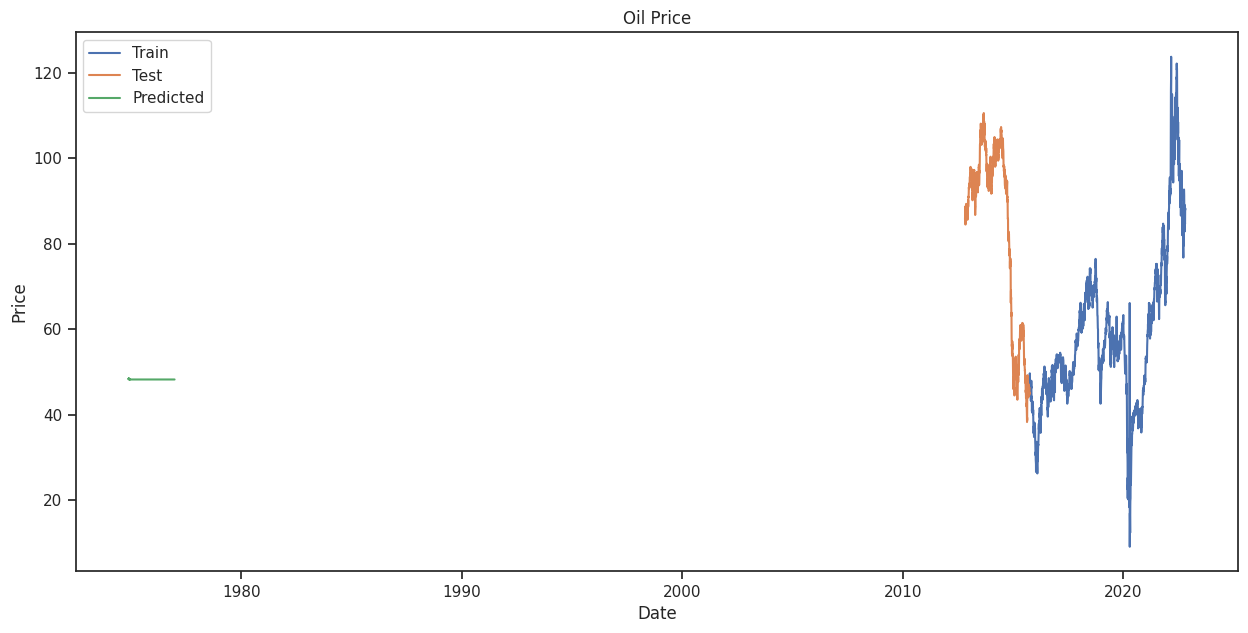

In [ ]:
#visualize test,train, predicted values

plt.figure(figsize=(15,7))
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.plot(pred_arima, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.legend()
plt.show()

SARIMAX

In [ ]:
# Additional code for model evaluation and sarima forecasting
sarima_model_forecast = SARIMAX(oilprice['close'], order=(0,1,1), seasonal_order=(0,0,1,22))
estimator_forecast = sarima_model_forecast.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Makes predictions
steps_ahead = 365
forecasts = estimator_forecast.forecast(steps_ahead)
ci = estimator_forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


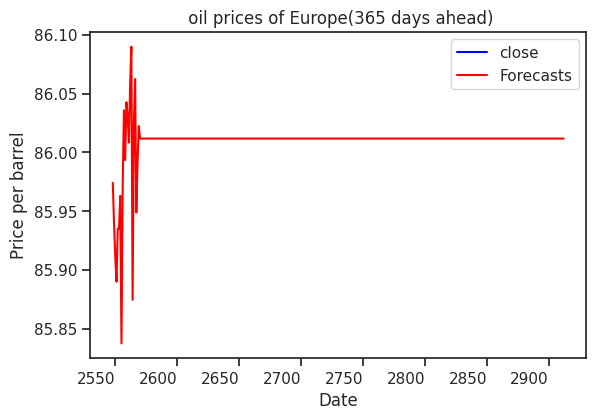

In [ ]:
# Displays the results
short_data = oilprice[oilprice.index.year >= 2023]
short_data.plot(color='blue', label='Actual')
forecasts.plot(color='red', label='Forecasts')

plt.title(' oil prices of Europe(365 days ahead)')
plt.xlabel('Date')
plt.ylabel('Price per barrel')
plt.legend()
plt.show()

In [ ]:
print('Forecasts for the following {} days: \n'.format(steps_ahead))
print(forecasts)

Forecasts for the following 365 days: 

2548    85.974082
2549    85.939386
2550    85.911051
2551    85.889895
2552    85.935193
          ...    
2908    86.011696
2909    86.011696
2910    86.011696
2911    86.011696
2912    86.011696
Name: predicted_mean, Length: 365, dtype: float64


EXPONENTIAL SMOOTHENING

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


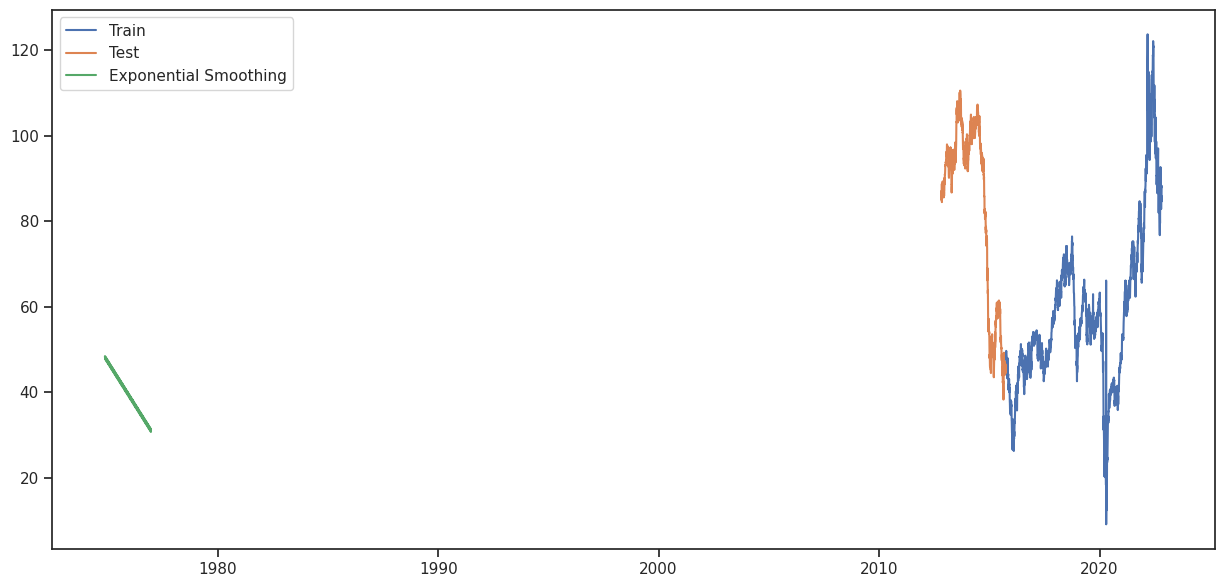

The root mean squared error is:  50.65976211570693


In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train['close'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
pred = model_fit.predict(start=start, end=end)
pred
plt.figure(figsize=(15,7))
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.plot(pred, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()
# prompt: check for rmse value

rmse=np.sqrt(mean_squared_error(test['close'],pred))
print("The root mean squared error is: ",rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


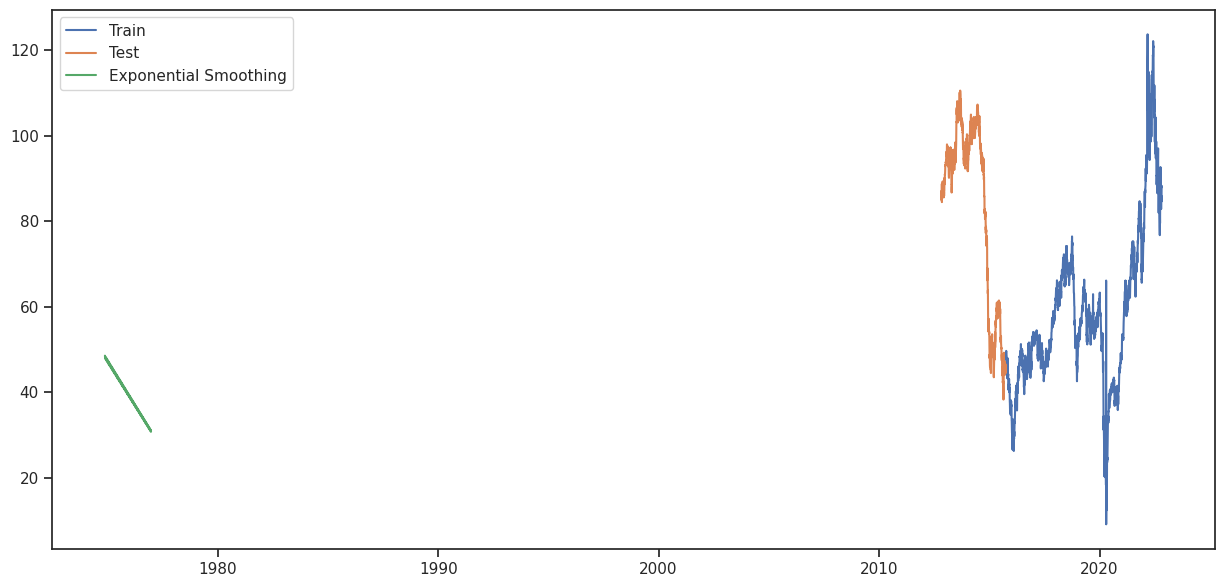

The root mean squared error is:  50.734200013098075


In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train['close'], trend='add', seasonal='mul', seasonal_periods=12)
model_fit = model.fit()
pred = model_fit.predict(start=start, end=end)
pred
plt.figure(figsize=(15,7))
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.plot(pred, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()
# prompt: check for rmse value

rmse=np.sqrt(mean_squared_error(test['close'],pred))
print("The root mean squared error is: ",rmse)

FBPROPHET model

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data2

,Date,close
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [ ]:
data2.fillna(data1['close'].mean(),inplace=True)

In [ ]:
data2.isna().sum()

ds    0
y     0
dtype: int64

In [ ]:
data2.rename(columns={'Date':'ds','close':'y'},inplace=True)

In [ ]:
PTRN=data2.tail(1548)
PTST=data2.head(1000)

In [ ]:
PTRN

,ds,y
1000,2018-11-08,60.67
1001,2018-11-07,61.67
1002,2018-11-06,62.21
1003,2018-11-05,63.10
1004,2018-11-02,63.14
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [ ]:
PTST

,ds,y
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
995,2018-11-15,56.46
996,2018-11-14,56.25
997,2018-11-13,55.69
998,2018-11-12,59.93


In [ ]:
m=Prophet()
m.fit(PTRN)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wb574ix/fr7qwldj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wb574ix/ewbp2dmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91308', 'data', 'file=/tmp/tmp_wb574ix/fr7qwldj.json', 'init=/tmp/tmp_wb574ix/ewbp2dmb.json', 'output', 'file=/tmp/tmp_wb574ix/prophet_modeljsa4mwcu/prophet_model-20240102113626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(PTST)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
995,2022-10-24,148.222645,-75.897850,369.363429
996,2022-10-25,148.079546,-74.543969,364.772706
997,2022-10-26,147.903813,-75.819569,365.380548
998,2022-10-27,147.760255,-78.334540,369.277227
999,2022-10-28,147.670646,-76.891203,369.914386


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-09,73.301178,67.350296,76.574286,73.301178,73.301178,-1.567334,-1.567334,-1.567334,0.817052,0.817052,0.817052,-2.384386,-2.384386,-2.384386,0.0,0.0,0.0,71.733844
1,2018-11-12,73.457344,67.489837,76.899625,73.457344,73.457344,-1.383520,-1.383520,-1.383520,0.730222,0.730222,0.730222,-2.113742,-2.113742,-2.113742,0.0,0.0,0.0,72.073824
2,2018-11-13,73.509399,67.575651,76.958290,73.509399,73.509399,-1.247671,-1.247671,-1.247671,0.766877,0.766877,0.766877,-2.014548,-2.014548,-2.014548,0.0,0.0,0.0,72.261728
3,2018-11-14,73.561454,67.677738,77.260362,73.561454,73.561454,-1.156527,-1.156527,-1.156527,0.759571,0.759571,0.759571,-1.916098,-1.916098,-1.916098,0.0,0.0,0.0,72.404927
4,2018-11-15,73.613510,67.752068,77.117993,73.613510,73.613510,-1.051391,-1.051391,-1.051391,0.769979,0.769979,0.769979,-1.821370,-1.821370,-1.821370,0.0,0.0,0.0,72.562118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-10-24,148.521029,-75.897850,369.363429,-75.993542,367.056428,-0.298385,-0.298385,-0.298385,0.730222,0.730222,0.730222,-1.028606,-1.028606,-1.028606,0.0,0.0,0.0,148.222645
996,2022-10-25,148.573085,-74.543969,364.772706,-76.282407,367.270647,-0.493539,-0.493539,-0.493539,0.766877,0.766877,0.766877,-1.260416,-1.260416,-1.260416,0.0,0.0,0.0,148.079546
997,2022-10-26,148.625140,-75.819569,365.380548,-76.445967,367.827664,-0.721327,-0.721327,-0.721327,0.759571,0.759571,0.759571,-1.480898,-1.480898,-1.480898,0.0,0.0,0.0,147.903813
998,2022-10-27,148.677195,-78.334540,369.277227,-76.609527,368.735759,-0.916940,-0.916940,-0.916940,0.769979,0.769979,0.769979,-1.686919,-1.686919,-1.686919,0.0,0.0,0.0,147.760255


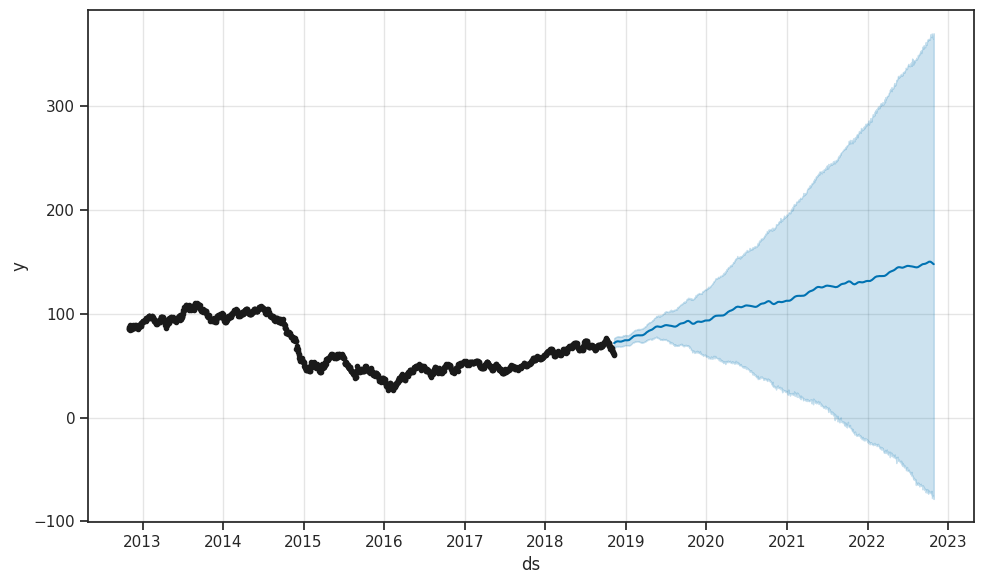

In [ ]:
fig1 = m.plot(forecast)

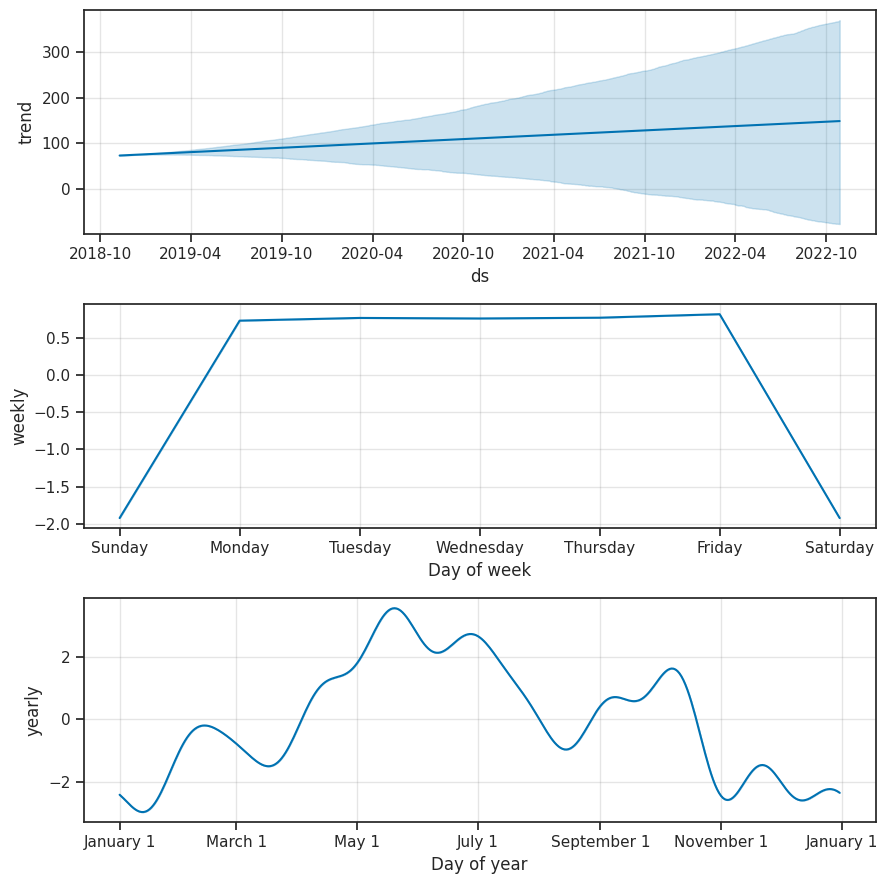

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
prmse=np.sqrt(mean_squared_error(PTST['y'],forecast['yhat']))


In [ ]:
import pickle
filename='prophet.sav'
pickle.dump(m,open(filename,'wb'))

In [ ]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
34.73.99.52


In [ ]:
! streamlit run lstm.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.99.52:8501

npx: installed 22 in 3.144s
your url is: https://spotty-adults-jog.loca.lt
2024-01-02 11:50:39.478590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 11:50:39.478657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 11:50:39.480126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 11:50:41.021321: W tensorflow/compiler/tf2tensorrt/utils/py_u